In [ ]:
%load_ext autoreload
%autoreload 2

### Download an example image

In [ ]:
import os
import requests

# Create the directory if it does not exist
examples_dir = "../instanseg/examples/"
if not os.path.exists(examples_dir):
    os.makedirs(examples_dir)

#This is the LuCa-7color_[13860,52919]_1x1 from Perkin Elmer CC-BY 4.0
download_url = "https://downloads.openmicroscopy.org/images/Vectra-QPTIFF/perkinelmer/PKI_fields/LuCa-7color_%5b13860,52919%5d_1x1component_data.tif"
local_file_path = os.path.join(examples_dir, "LuCa1.tif")

# Download the file using requests
response = requests.get(download_url, stream=True)
response.raise_for_status()
with open(local_file_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"File downloaded to {local_file_path}")

### Download pretrained models

In [1]:
from instanseg import InstanSeg
from instanseg.utils.utils import show_images

import os

# Create the directory if it does not exist
examples_dir = "../instanseg/examples/"
if not os.path.exists(examples_dir):
    os.makedirs(examples_dir)

# instanseg_brightfield = InstanSeg("brightfield_nuclei", verbosity=1)
instanseg_fluorescence = InstanSeg("fluorescence_nuclei_and_cells", verbosity=1)

Model fluorescence_nuclei_and_cells downloaded and extracted to c:\Users\smith6jt\miniforge3\envs\KINTSUGI\lib\site-packages\instanseg\utils\../bioimageio_models/
Requesting default device: cuda


**The easiest way to use the model is to call the eval method:**


Model fluorescence_nuclei_and_cells downloaded and extracted to c:\Users\smith6jt\miniforge3\envs\KINTSUGI\lib\site-packages\instanseg\utils\../bioimageio_models/
Requesting default device: cuda


c:\Users\smith6jt\miniforge3\envs\KINTSUGI\lib\site-packages\pydantic\_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')
c:\Users\smith6jt\miniforge3\envs\KINTSUGI\lib\site-packages\aicsimageio\readers\tiff_reader.py:148: UserWarning: Could not parse tiff pixel size: 'unit'
  warnings.warn(f"Could not parse tiff pixel size: {e}")


BioImage does not support the image: '../instanseg/examples/Fluorescence_example.tif'. You may need to install an extra format dependency. See our list of known plugins in the bioio README here: https://github.com/bioio-devs/bioio for a list of known plugins. You can also call the 'bioio.plugins.dump_plugins()' method to report information about currently installed plugins or the 'bioio.plugin_feasibility_report(image)' method to check if a specific image can be handled by the available plugins.


c:\Users\smith6jt\miniforge3\envs\KINTSUGI\lib\site-packages\instanseg\instanseg.py:450: UserWarning: Pixel size not provided, this may lead to innacurate results.
  warnings.warn("Pixel size not provided, this may lead to innacurate results.")


Could not read pixel size from image metadata.


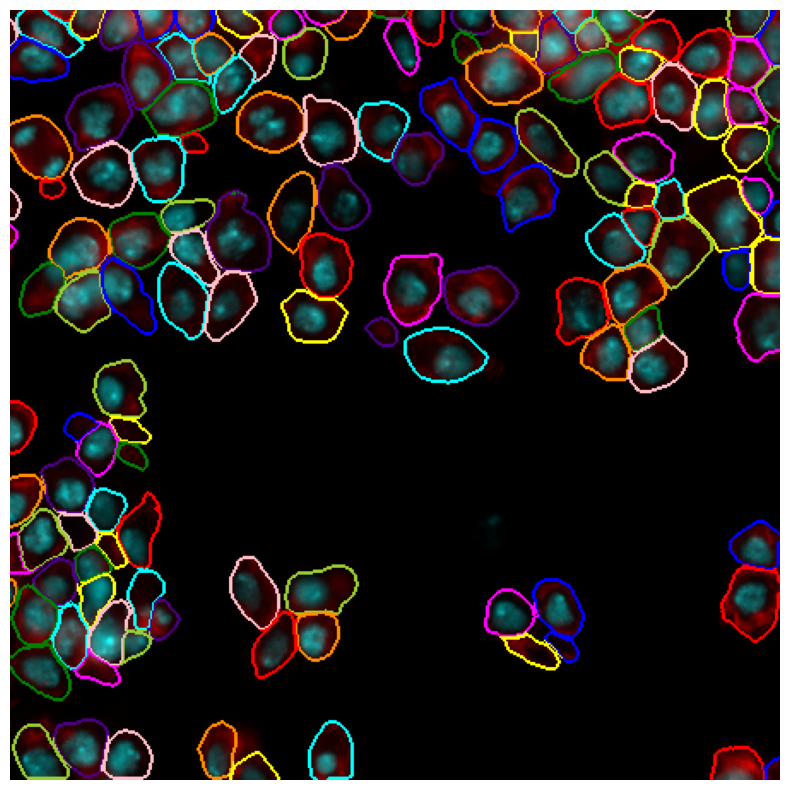

In [3]:
instanseg_fluorescence = InstanSeg("fluorescence_nuclei_and_cells", verbosity=1)

image_array, pixel_size = instanseg_fluorescence.read_image("../instanseg/examples/Fluorescence_example.tif")

labeled_output, image_tensor  = instanseg_fluorescence.eval_medium_image(image_array, pixel_size, target= "cells")

display = instanseg_fluorescence.display(image_tensor, labeled_output)

show_images(display, colorbar=False)
                                            

**Most of the time, we need more granularity, so the inference can be broken down in smaller steps:**


In [ ]:
image_array, pixel_size = instanseg_brightfield.read_image("../instanseg/examples/HE_example.tif")

labeled_output, image_tensor  = instanseg_brightfield.eval_small_image(image_array, pixel_size)

display = instanseg_brightfield.display(image_array, labeled_output)

show_images(image_array,display, colorbar=False, titles = ["Original Image", "Image with segmentation"])


**InstanSeg is designed for the segmentation of cells and nuclei in multiplexed images too**

In [ ]:

image_array, pixel_size = instanseg_fluorescence.read_image("../instanseg/examples/LuCa1.tif")

labeled_output, image_tensor  = instanseg_fluorescence.eval_small_image(image_array, pixel_size, resolve_cell_and_nucleus=False, cleanup_fragments = True)

display = instanseg_fluorescence.display(image_tensor, labeled_output)

show_images(display, colorbar=False)



**Your image is too large to fit on the GPU? You can run InstanSeg across the image tiles.**

*The whole image still has to fit in RAM using *eval_medium_image*


By default, InstanSeg will output both cells and nuclei. You can specifiy the target parameter to predict only cells or nuclei

In [ ]:
instanseg_fluorescence = InstanSeg("fluorescence_nuclei_and_cells", verbosity=1)

image_array, pixel_size = instanseg_fluorescence.read_image("../instanseg/examples/LuCa1.tif")

labeled_output, image_tensor  = instanseg_fluorescence.eval_medium_image(image_array, pixel_size, target= "cells")

display = instanseg_fluorescence.display(image_tensor, labeled_output)

show_images(display, colorbar=False)


**Your image is too large to fit in RAM? You can still run InstanSeg across whole slide images**

This is still an experimental feature


In [ ]:
instanseg_brightfield.eval_whole_slide_image("path_to_whole_slide_image")

Experimental ! You can play around with these features - but we may not be able to help you debug or answer your questions...

In [ ]:

image_array, pixel_size = instanseg_fluorescence.read_image("../instanseg/examples/LuCa1.tif")

labeled_output, image_tensor  = instanseg_fluorescence.eval_small_image(image_array, pixel_size, resolve_cell_and_nucleus=False, mean_threshold = 0.3, cleanup_fragments = True)

display = instanseg_fluorescence.display(image_tensor, labeled_output)

show_images(display, colorbar=False)



In [ ]:
instanseg_fluorescence = InstanSeg("fluorescence_nuclei_and_cells", verbosity=0)

image_array, pixel_size = instanseg_fluorescence.read_image("../instanseg/examples/LuCa1.tif")

labeled_output, image_tensor  = instanseg_fluorescence.eval_small_image(image_array, pixel_size, target= "cells")

display = instanseg_fluorescence.display(image_tensor, labeled_output)

#you'll need extra libraries for this, but you can cluster the instances by mean channel intensity and show a umap.
instanseg_fluorescence.cluster_instances_by_mean_channel_intensity(image_tensor,labeled_output )


                                